# Random Sample Generator for Lazada Comments Dataset

This notebook randomly selects 800 comments evenly distributed across different product types from the Simple_Label.csv dataset.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

## 1. Loading the Dataset

In [14]:
# Load the dataset
file_path = '../Labeled_Data/Simple_Label.csv'
df = pd.read_csv(file_path)

# Display the basic information about the dataset
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (7973, 4)


,title,content,type,aspect
0,5,"Sách rất hay. Dựa trên nghiên cứu, và có hướng...",0,quality
1,5,Nội dung sách quá hay Rất đơn giản và dễ áp dụ...,0,quality
2,5,Quyển này hay mà tác giả viết rất dễ đọc nha n...,0,quality
3,5,Dạo này thói quen xấu lại bủa vây nên tôi quyế...,0,"ship, quality, price"
4,5,"Tiki giao thần tốc, mình đặt 1h sáng giao chiề...",0,"ship, quality, price, cskh"


## 1.2 Drop row has Other in aspsect

In [15]:
#Drop "Other" Value in aspect column
df = df[df['aspect'] != 'other'] 

In [16]:
df['aspect'].unique()  


array(['quality', 'ship, quality, price', 'ship, quality, price, cskh',
       'ship, quality', 'quality, price', 'ship', 'ship, quality, cskh',
       'ship, price', 'quality, cskh', 'price', 'ship, cskh', 'cskh',
       'quality, price, cskh', 'price, cskh', 'ship, price, cskh'],
      dtype=object)

In [21]:
df.to_csv('../Labeled_Data/Simple_LabelWithoutOther.csv', index=False)

## 2. Data Exploration and Analysis

Columns in the dataset:
Index(['title', 'content', 'type', 'aspect'], dtype='object')

Distribution of product types:
type
0     4560
4      498
9      327
18     169
3      133
11     130
2       94
5       87
14      70
25      65
6       52
7       44
13      30
20      28
16      28
15      28
21      23
22      22
19      15
17      14
10      13
8       12
23      11
12      10
24       5
1        1
Name: count, dtype: int64


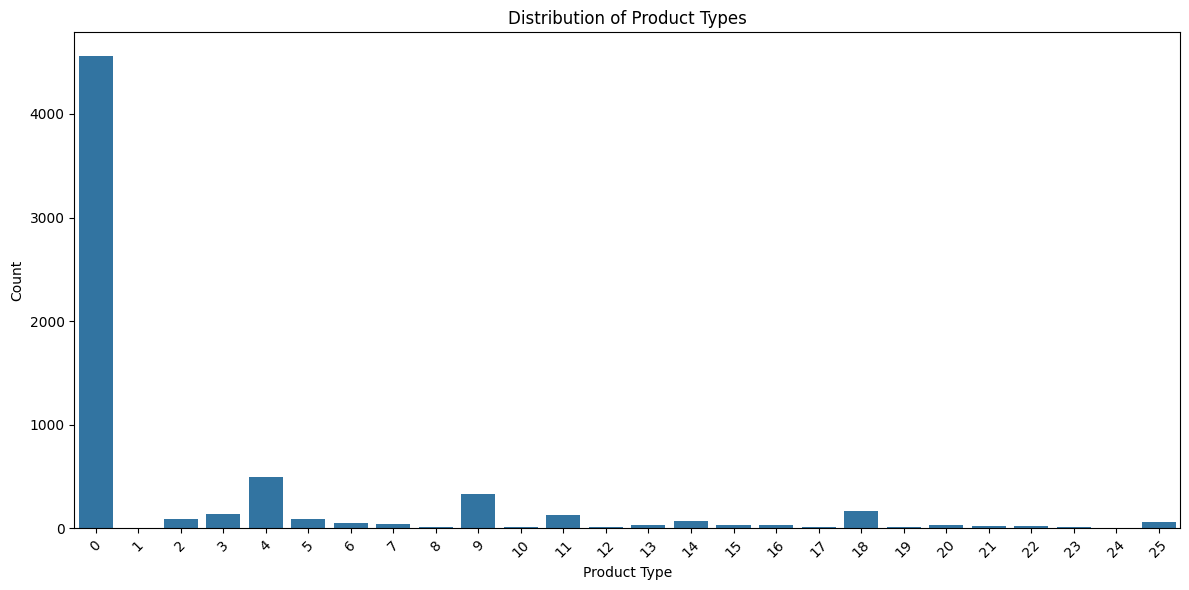

In [17]:
# Check the columns in the dataset
print("Columns in the dataset:")
print(df.columns)

# Analyze the distribution of product types
type_counts = df['type'].value_counts()
print("\nDistribution of product types:")
print(type_counts)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Distribution of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Random Sampling Function

Let's create a function that will sample evenly from each product type category.

In [18]:
def get_balanced_sample(dataframe, n_samples=800):
    """
    Extract a balanced sample of comments across different product types.
    
    Args:
        dataframe: Pandas DataFrame containing the dataset
        n_samples: Total number of samples to extract (default: 800)
        
    Returns:
        Pandas DataFrame with the balanced samples
    """
    # Get unique product types
    unique_types = dataframe['type'].unique()
    n_types = len(unique_types)
    
    print(f"Found {n_types} unique product types")
    
    # Calculate samples per type
    samples_per_type = n_samples // n_types
    remaining = n_samples % n_types
    
    print(f"Will sample approximately {samples_per_type} comments per product type")
    
    # Initialize the result dataframe
    sampled_df = pd.DataFrame()
    
    # Sample from each type
    for type_id in unique_types:
        # Filter the dataframe for this type
        type_df = dataframe[dataframe['type'] == type_id]
        
        # Determine how many samples to take from this type
        if remaining > 0:
            type_samples = samples_per_type + 1
            remaining -= 1
        else:
            type_samples = samples_per_type
        
        # Check if we have enough data for this type
        if len(type_df) < type_samples:
            print(f"Warning: Type {type_id} has only {len(type_df)} comments, taking all available comments")
            type_sample = type_df
        else:
            type_sample = type_df.sample(n=type_samples, random_state=42)
        
        # Add to the result
        sampled_df = pd.concat([sampled_df, type_sample])
        
    print(f"Final sample size: {len(sampled_df)} comments")
    return sampled_df

## 4. Generate Balanced Sample

Found 26 unique product types
Will sample approximately 30 comments per product type
Final sample size: 611 comments

Distribution of product types in our sample:
type
0     31
2     31
6     31
3     31
4     31
5     31
9     31
7     31
14    31
11    31
18    31
13    30
25    30
20    28
16    28
15    28
21    23
22    22
19    15
17    14
10    13
8     12
23    11
12    10
24     5
1      1
Name: count, dtype: int64


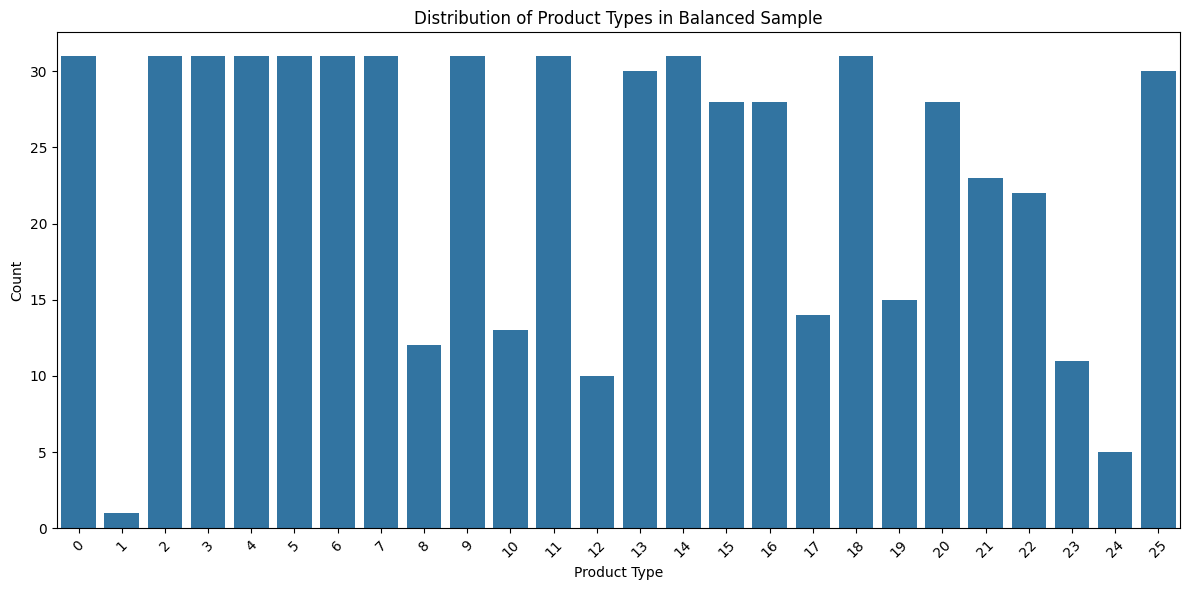

In [19]:
# Apply our sampling function
balanced_sample = get_balanced_sample(df, n_samples=800)

# Verify the distribution in our sample
sample_type_counts = balanced_sample['type'].value_counts()
print("\nDistribution of product types in our sample:")
print(sample_type_counts)

# Plot the distribution of our sample
plt.figure(figsize=(12, 6))
sns.barplot(x=sample_type_counts.index, y=sample_type_counts.values)
plt.title('Distribution of Product Types in Balanced Sample')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Save the Balanced Sample

In [20]:
# Shuffle the balanced sample
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced sample to a new CSV file
output_path = '../Labeled_Data/balanced_sample_800.csv'
balanced_sample.to_csv(output_path, index=False)
print(f"Balanced sample saved to {output_path}")

# Display a few random samples
print("\nSample comments from our balanced dataset:")
balanced_sample.sample(5)[['title', 'content', 'type', 'aspect']]

Balanced sample saved to ../Labeled_Data/balanced_sample_800.csv

Sample comments from our balanced dataset:


,title,content,type,aspect
81,5,"giao hàng siêu nhanh, ưu đãi tốt mặc dù chả ba...",22,"ship, quality, price"
218,5,Rất đẹp và chắc chân,15,quality
55,5,"giá tốt+ giao nhanh+ date hơi xa( 5 tháng),ko ...",9,"ship, quality, price"
599,5,"Chính hãng, giao tỉnh lẻ mà siêu nhanh",3,ship
264,5,"Giao đủ, sách mới",0,"ship, quality"


## 6. Summary

In this notebook, we've created a balanced sample of 800 comments evenly distributed across different product types from the original dataset. This balanced sample can be used for further analysis, model training, or visualization purposes.